In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
training_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
#train_dir = r"../owocowaBaza/train"
train_dir = r"fruitSplit\train"
train_gen = training_datagen.flow_from_directory(train_dir, #directory containing various fruits
                                                target_size=(150, 150), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="categorical") #categorial because of multi-class classification. 
                                                #if only two classes, then "binay"

Found 47612 images belonging to 14 classes.


In [12]:
val_dir = r"fruitSplit\val"
#val_dir = r"../owocowaBaza/val"
val_gen = validation_datagen.flow_from_directory(val_dir, #directory containing various fruits
                                                target_size=(150, 150), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="categorical")

Found 10198 images belonging to 14 classes.


In [5]:
# apple directory
train_apple_dir = r"fruitSplit\train\Apple"

# printing the number of apples in train dataset
number_apples_train = len(os.listdir(train_apple_dir))
print("total training apple images:", number_apples_train)

#banana directory
train_banana_dir = r"fruitSplit\train\Banana"

# printing the number of bananas in train dataset
number_banana_train = len(os.listdir(train_banana_dir))
print("total training banana images:", number_banana_train)

total training apple images: 7584
total training banana images: 2118


In [28]:
apple_names = os.listdir(train_apple_dir)
apple_names[:10]
banana_names = os.listdir(train_banana_dir)
banana_names[:10]

['79Banana02063.png',
 '87Banana02109.png',
 'Banana01.png',
 'Banana010.png',
 'Banana0100.png',
 'Banana01001.png',
 'Banana01002.png',
 'Banana01004.png',
 'Banana01006.png',
 'Banana01007.png']

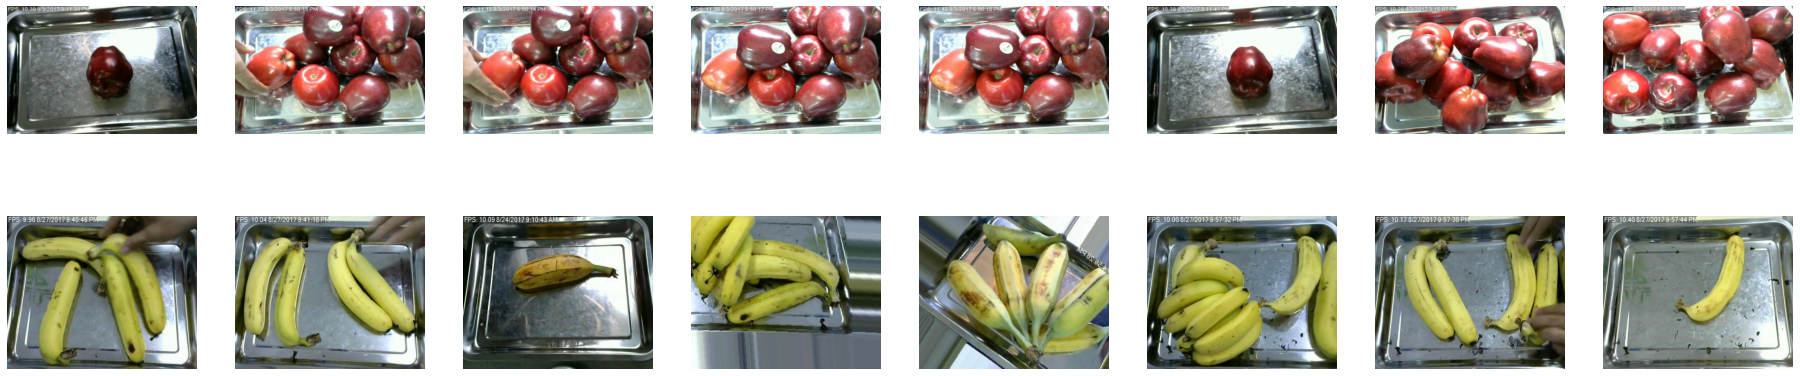

In [29]:
# objective is to print images to get a preview. 

# parameters for the graph. The images will be in a 4x4 configuration
nrows = 8
ncols = 8

pic_index = 0 #index for iterating over images

#set up matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

apple_pic = [os.path.join(train_apple_dir, fname) for fname in apple_names[pic_index-8:pic_index]]
banana_pic = [os.path.join(train_banana_dir, fname) for fname in banana_names[pic_index-8:pic_index]]

for i, img_path in enumerate(apple_pic + banana_pic):
    # setting up subplot. subplots start at index 1
    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("Off") #turning off axis. Don't show axis
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [13]:
# model A
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten before feeding into Dense neural network. 
    tf.keras.layers.Flatten(),
    # 512 neurons in the hidden layer
    tf.keras.layers.Dense(512, activation="relu"),
   
    tf.keras.layers.Dense(14, activation="softmax")
    #tf.keras.layers.Dense(15, activation="softmax")
]);

In [ ]:
# model B
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    # 512 neurons in the hidden layer
    tf.keras.layers.Dense(100, activation="relu"),
    # 15 = 15 different categories
    # softmas takes a set of values and effectively picks the biggest one. for example if the output layer has
    # [0.1,0.1,0.5,0.2,0.1], it will take it and turn it into [0,0,1,0,0]
    tf.keras.layers.Dense(14, activation="softmax")
    #tf.keras.layers.Dense(15, activation="softmax")
]);

In [ ]:
# model C
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150, 3)),
    tf.keras.layers.SpatialDropout2D(1,1),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    # 512 neurons in the hidden layer
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(14, activation="softmax")
]);

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 0.98

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_accuracy") is not None and logs.get("val_accuracy") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True
            
callbacks = myCallback()

In [15]:
model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [16]:
with tf.device('/gpu:0'):
    fruit_model = model.fit(train_gen, epochs=100, validation_data=val_gen, verbose=1, 
                                  callbacks = [callbacks], workers=10)

filepath = r"modelA"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save("fruitA.h5")


Epoch 1/100
1488/1488 [==============================] - 256s 170ms/step - loss: 0.5703 - accuracy: 0.8203 - val_loss: 0.1237 - val_accuracy: 0.9543
Epoch 2/100
1488/1488 [==============================] - 252s 169ms/step - loss: 0.1617 - accuracy: 0.9521 - val_loss: 0.1091 - val_accuracy: 0.9648
Epoch 3/100
1488/1488 [==============================] - 253s 170ms/step - loss: 0.1622 - accuracy: 0.9624 - val_loss: 0.1131 - val_accuracy: 0.9715
Epoch 4/100
1488/1488 [==============================] - 258s 173ms/step - loss: 0.4756 - accuracy: 0.9643 - val_loss: 0.1860 - val_accuracy: 0.9526
Epoch 5/100
1488/1488 [==============================] - 255s 171ms/step - loss: 0.1630 - accuracy: 0.9693 - val_loss: 0.4708 - val_accuracy: 0.9437
Epoch 6/100
1488/1488 [==============================] - 256s 172ms/step - loss: 0.1793 - accuracy: 0.9724 - val_loss: 0.2781 - val_accuracy: 0.9623
Epoch 7/100
1488/1488 [==============================] - 259s 174ms/step - loss: 0.1901 - accuracy: 0.9741

In [17]:
# Convert the model.
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('fruitA.h5')
tflite_model = converter.convert()

# Save the model.
with open('modelA.tflite', 'wb') as f:
  f.write(tflite_model)

  

INFO:tensorflow:Assets written to: C:\Users\hanna\AppData\Local\Temp\tmpygpluamc\assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmpygpluamc\variables\variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_4_input
INFO:tensorflow: tensor name: serving_default_conv2d_4_input:0, shape: (-1, 150, 150, 3), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3
INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 14), type: DT_FLOAT
INFO

In [23]:
#save("historiaA.txt",fruit_model.history)

with open("historiaA.txt",'w') as f:
    for k in fruit_model.history.keys():
        print(k,file=f)
        for i in fruit_model.history[k]:
            print(i,file=f)

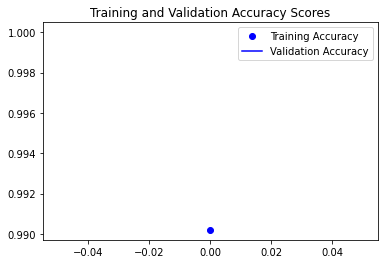

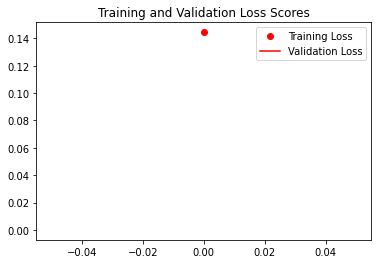

In [16]:
acc = fruit_model.history['accuracy'] #training accuracy scores from the model that has been trained
val_acc = fruit_model.history['val_accuracy'] #validation accuracy scores from the model that has been trained
loss = fruit_model.history['loss'] #training loss scores from the model that has been trained
val_loss = fruit_model.history['val_loss'] #validation loss scores from the model that has been trained

epochs = range(len(acc)) #x axis

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy Scores')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss Scores')

plt.legend()

plt.show()